Histograms and scatter plots for the Mante full-rank network used in figure 1.

In [3]:
import sys
sys.path.append('../')
from low_rank_rnns.modules import *
from low_rank_rnns import mante, helpers, regressions
import low_rank_rnns.mixedselectivity as ms
import numpy as np
import seaborn as sns
from matplotlib.patches import Ellipse

In [4]:
helpers.setup_matplotlib()
color = sns.color_palette('deep')[3]

In [7]:
size = 512
alpha = .2
noise_std = 5e-2
x_train, y_train, mask_train, x_val, y_val, mask_val = mante.generate_mante_data(1000, fraction_validation_trials=.2)
net = FullRankRNN(4, size, 1, noise_std, alpha, rho=1, train_wi=True)
net.load_state_dict(torch.load('../models/mante_fr_fig1.pt', map_location='cpu'))

<All keys matched successfully>

In [8]:
loss, acc = mante.test_mante(net, x_val, y_val, mask_val)
print(loss, acc)

0.08763374388217926 0.9850000143051147


In [9]:
reg_space, r2 = regressions.regression_mante(net)

(500, 512)
clusteriness: 0.6573370981143383
data mean: 0.212, mc mean: 0.248
KS 2 sample test: p=2.2727597191144755e-31
Wilcoxon rank-sum test: p=1.183165998400715e-29
Kruskal-Wallis test: p=1.1831659285552987e-29


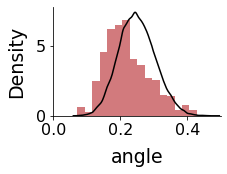

In [10]:
figsize = plt.rcParams['figure.figsize']
figsize = (figsize[0] / 2, figsize[1] / 2)
p_reg, c_reg = ms.epairs(reg_space, 500, figsize=figsize, xlim=(-0., .5), col=color)
# plt.savefig('figure_1/epairs_mante_reg.pdf', bbox_inches='tight')

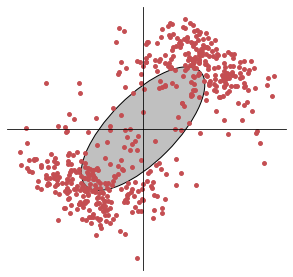

In [11]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.scatter(reg_space[:, 0], reg_space[:, 1], s=15, color=sns.color_palette('deep')[3])
ax.set_aspect(1)
helpers.center_axes(ax)

X = np.array([reg_space[:, 0], reg_space[:, 1]]).T
cov = X.T @ X / X.shape[0]
eigvals, eigvecs = np.linalg.eig(cov)
v1 = eigvecs[:, 0]
angle = np.arctan(v1[1] / v1[0])
angle = angle * 180 / np.pi
std_factor = 1
ax.add_artist(Ellipse(xy=[0, 0], 
                      angle=angle,
                      width=np.sqrt(eigvals[0]) * 2 * std_factor, 
                      height=np.sqrt(eigvals[1]) * 2 * std_factor, 
                      fill=True, fc='silver', ec='black', lw=1, zorder=-1))

# plt.savefig('figure_1/mante_reg_scatter.pdf', bbox_inches='tight')